In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import KFold,cross_val_score

In [33]:
path = r"/content/drive/MyDrive/spam-email.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocessing

In [35]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.dropna(inplace=True)
df.rename(columns={'label_num': 'spam'}, inplace=True)
df

,label,text,spam
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [36]:
df['spam'].value_counts()

0    3672
1    1499
Name: spam, dtype: int64

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(4993, 3)

In [39]:
x=df['text']
y=df['spam']

#Feature Extrection

In [40]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [41]:
x

<4993x50447 sparse matrix of type '<class 'numpy.int64'>'
	with 447953 stored elements in Compressed Sparse Row format>

In [42]:
df.info

<bound method DataFrame.info of      label                                               text  spam
0      ham  Subject: enron methanol ; meter # : 988291\r\n...     0
1      ham  Subject: hpl nom for january 9 , 2001\r\n( see...     0
2      ham  Subject: neon retreat\r\nho ho ho , we ' re ar...     0
3     spam  Subject: photoshop , windows , office . cheap ...     1
4      ham  Subject: re : indian springs\r\nthis deal is t...     0
...    ...                                                ...   ...
5165   ham  Subject: fw : crosstex energy , driscoll ranch...     0
5166   ham  Subject: put the 10 on the ft\r\nthe transport...     0
5167   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...     0
5169   ham  Subject: industrial worksheets for august 2000...     0
5170  spam  Subject: important online banking alert\r\ndea...     1

[4993 rows x 3 columns]>

# Split Data into Train and Test

In [43]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (3495, 50447)
sahpe of y_train (3495,)
sahpe of X_test (1498, 50447)
sahpe of y_test (1498,)


# Naive Bayes Classifier

In [44]:
mb=MultinomialNB()
mb.fit(X_train,y_train)

MultinomialNB()

In [45]:
y_pred=mb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
mb.score(X_test,y_test)

0.9813084112149533

# Logistic Regression

In [47]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred1=lr.predict(X_test)

# Support Vector Classifier (rbf)

In [49]:
c_rbf=SVC(kernel='rbf')
c_rbf.fit(X_train,y_train)


SVC()

In [50]:
y_pred2=c_rbf.predict(X_test)

# Using Linear Kernal

In [51]:
c_linear=SVC(kernel='linear')
c_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [52]:
y_pred3=c_linear.predict(X_test)

# Accuracy Score

In [53]:
print('Accuracy of Naive Bayes',accuracy_score(y_test,y_pred))
print('Accuracy of Logistic Regression',accuracy_score(y_test,y_pred1))
print('Accuracy of Support vector(rbf)',accuracy_score(y_test,y_pred2))
print('Accuracy of Support vector(Kernal)',accuracy_score(y_test,y_pred3))

Accuracy of Naive Bayes 0.9813084112149533
Accuracy of Logistic Regression 0.9712950600801068
Accuracy of Support vector(rbf) 0.9559412550066756
Accuracy of Support vector(Kernal) 0.9672897196261683


# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

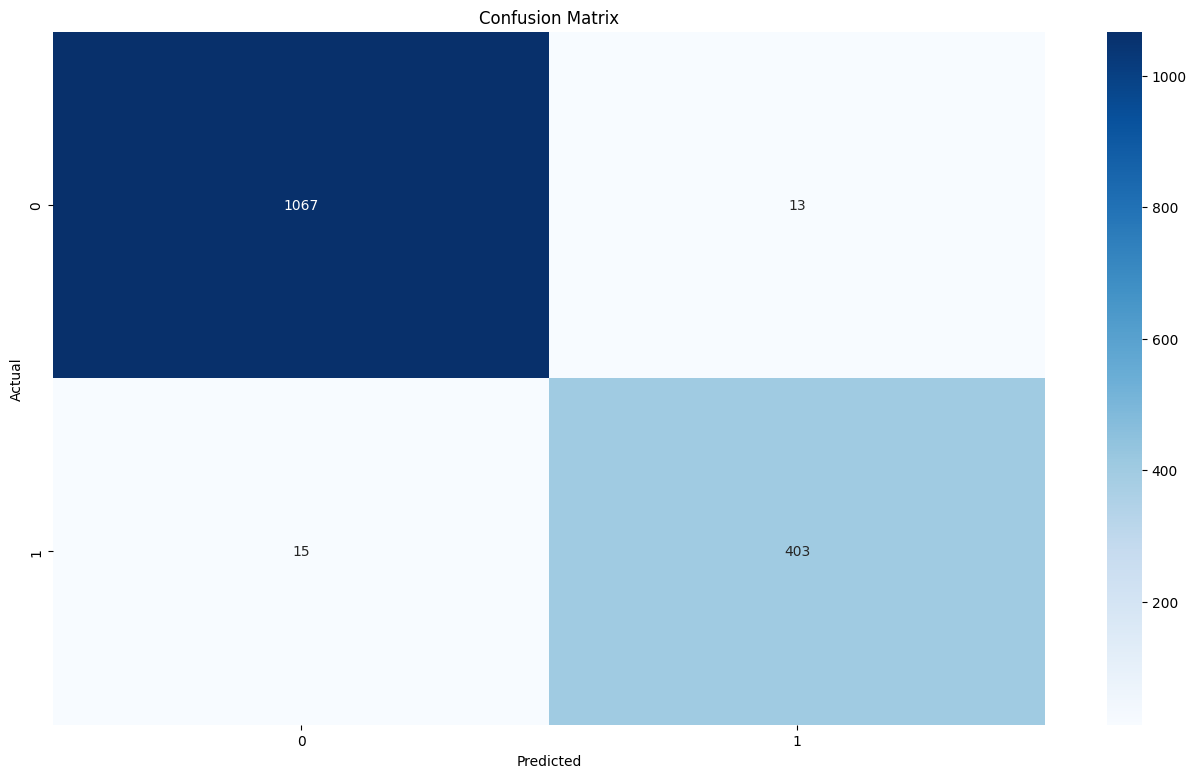

In [54]:
plt.figure(figsize=(16,9))
df=pd.DataFrame(confusion_matrix(y_test,y_pred))
sns.heatmap(df,annot=True, fmt='d',cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

#classification Report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1080
           1       0.97      0.96      0.97       418

    accuracy                           0.98      1498
   macro avg       0.98      0.98      0.98      1498
weighted avg       0.98      0.98      0.98      1498



# Model Overfit Or Not

In [56]:
cvs=cross_val_score(mb,X_train,y_train,cv=20)
cvs, cvs.mean()

(array([0.97714286, 0.99428571, 0.97714286, 0.98285714, 0.98857143,
        0.98285714, 0.98285714, 0.97714286, 0.97142857, 0.97714286,
        0.98857143, 0.97142857, 0.98285714, 0.98857143, 0.98285714,
        0.99425287, 0.98850575, 0.99425287, 0.98275862, 0.98850575]),
 0.9836995073891626)

#Model Save

In [57]:
import joblib
joblib.dump(lr,'Email Spam Detection.pkl')

['Email Spam Detection.pkl']